## Plot energies and controls

## Library

In [1]:
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from dolfin import *
import torch

## Data load

In [2]:
control = np.loadtxt('control100.dat')
history = np.loadtxt('history100.dat')
time_control = control[:,0]
vel_control = control[:,1]
tmp_control = control[:,2]
time_energy = history[:,0]
vel_pert_energy = history[:,3]
tmp_pert_energy = history[:,4]


## Plot velocity perturbation energy

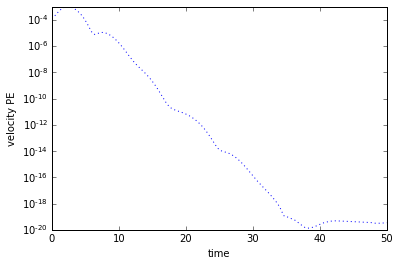

In [3]:
plt.plot(time_energy,vel_pert_energy,linestyle=':')
plt.xlabel('time')
plt.ylabel('velocity PE')
plt.yscale('log')

## Plot temperature perturbation energy

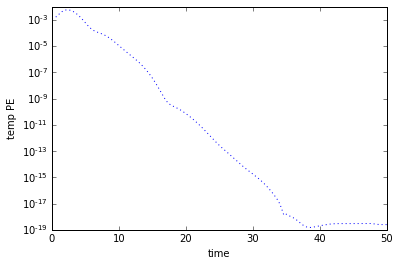

In [4]:
plt.plot(time_energy,tmp_pert_energy,linestyle=':')
plt.xlabel('time')
plt.ylabel('temp PE')
plt.yscale('log')

## Plot evolution of velocity control

Text(0, 0.5, 'velocity control')

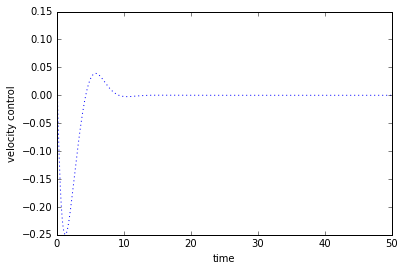

In [5]:
plt.plot(time_control,vel_control,linestyle=':')
plt.xlabel('time')
plt.ylabel('velocity control')

## Plot evolution of temperature control

Text(0, 0.5, 'temp control')

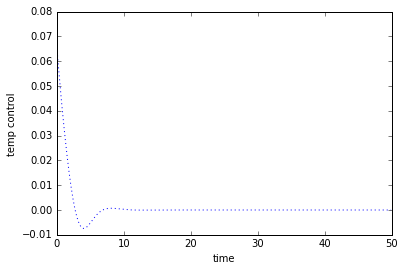

In [6]:
plt.plot(time_control,tmp_control,linestyle=':')
plt.xlabel('time')
plt.ylabel('temp control')

## Plot locally refined mesh

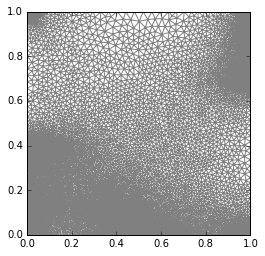

In [15]:
mesh = Mesh('square.xml')
plot(mesh)
plt.show()

## Finite elements

In [8]:
V = VectorElement("CG", mesh.ufl_cell(), 2)
W = FiniteElement("CG", mesh.ufl_cell(), 2)
Q = FiniteElement("CG", mesh.ufl_cell(), 1)
X = FunctionSpace(mesh, MixedElement([V, W, Q]))
up = Function(X)
u, T, p = up.split(True)
s_vel = torch.from_numpy(np.load('solu100.npy'))
s_tmp = torch.from_numpy(np.load('solT100.npy'))
s_press = torch.from_numpy(np.load('solp100.npy'))
print(np.shape(s_vel))
print(np.shape(s_tmp))
print(np.shape(s_press))
u.vector()[:] = s_vel[500,:]
T.vector()[:] = s_tmp[500,:]
p.vector()[:] = s_press[500,:]



torch.Size([501, 61474])
torch.Size([501, 30737])
torch.Size([501, 7780])


## Plot velocity

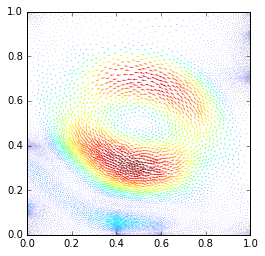

In [28]:
plot(u)
plt.show()

## Plot temperature

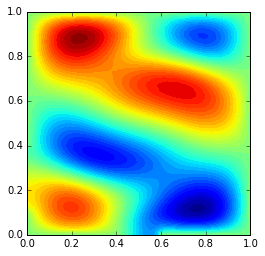

In [31]:
plot(T)
plt.show()

## Plot pressure

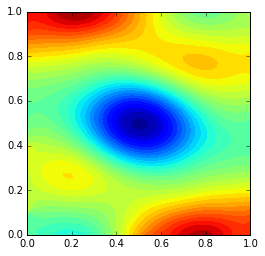

In [30]:
plot(p)
plt.show()